$y = 4 x^3 + 2 x^2 + x +5$

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import xgboost as xgb

In [5]:
X = np.linspace(-20, 20, 200)
X[0:10]

array([-20.        , -19.79899497, -19.59798995, -19.39698492,
       -19.1959799 , -18.99497487, -18.79396985, -18.59296482,
       -18.3919598 , -18.19095477])

In [8]:
y_true = 4*X**3 + 2*X**2 + X +5
y[0:10]

array([-31215.        , -30275.63871033, -29355.3143492 , -28453.83200757,
       -27570.99677639, -26706.61374662, -25860.48800922, -25032.42465516,
       -24222.22877538, -23429.70546084])

In [17]:
y_noisy = y_true + np.random.randn(len(y_true))*3
y_noisy[0:10]

array([-31210.80183406, -30278.93687741, -29361.73270519, -28451.16047925,
       -27569.68390573, -26701.29489038, -25862.97410113, -25032.72628781,
       -24220.37184466, -23428.03313683])

In [19]:
from sklearn.model_selection import  train_test_split

In [22]:
X_train, X_val, y_train, y_val = train_test_split(X, y_noisy, test_size= .2, random_state =2)

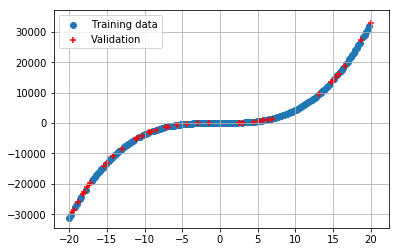

In [23]:
plt.scatter(X_train, y_train, label = 'Training data')
plt.scatter(X_val, y_val, c='red', marker='+', label = 'Validation')
plt.grid(True)
plt.legend()

In [24]:
np.corrcoef(X_train, y_train)

array([[1.        , 0.91020102],
       [0.91020102, 1.        ]])

In [25]:
from sklearn.linear_model import  LinearRegression

In [26]:
linear_reg = LinearRegression()

In [28]:
X_train= X_train[:,np.newaxis]
X_val= X_val[:,np.newaxis]

In [29]:
linear_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [41]:
y_pred_linear = linear_reg.predict(X_train)

In [42]:
from sklearn.metrics import mean_squared_error

In [46]:
rmse_train = mean_squared_error(y_train, y_pred_linear)**(.5)

In [44]:
y_val_pred = linear_reg.predict(X_val)

In [45]:
rmse_val = mean_squared_error(y_val, y_val_pred)**(.5)

ValueError: x and y must have same first dimension, but have shapes (100,) and (1,)

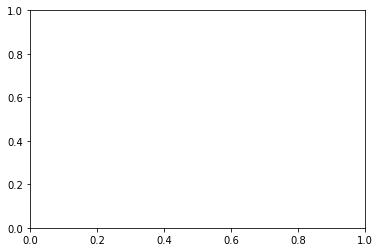

In [47]:
plt.plot(range(1, iteration+1) , rmse_train, label= 'training error(rmse)')
plt.plot(range(1, iteration +1) , rmse_val,c= 'green',marker='+',label= 'validation error(rmse)')
plt.grid(True)
plt.xlabel('iteration')
plt.ylabel('rmse')
plt.title('plot of training and validation error vs iterations')
plt.legend()

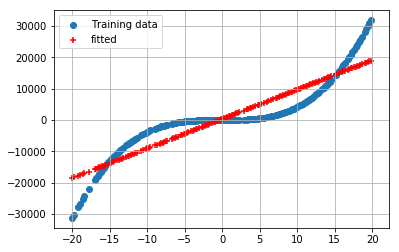

In [32]:
plt.scatter(X_train, y_train, label = 'Training data')
plt.scatter(X_train, y_pred_linear, c='red', marker='+', label = 'fitted')
plt.grid(True)
plt.legend()

In [33]:
xgb_reg= xgb.XGBRegressor()

In [35]:
xgb_reg.fit(X_train, y_train, eval_set= [(X_train, y_train), (X_val, y_val)])

[0]	validation_0-rmse:10639	validation_1-rmse:13281.5
[1]	validation_0-rmse:9707.37	validation_1-rmse:12083
[2]	validation_0-rmse:8858.47	validation_1-rmse:11125.9
[3]	validation_0-rmse:8084.48	validation_1-rmse:10161.3
[4]	validation_0-rmse:7381.13	validation_1-rmse:9320.04
[5]	validation_0-rmse:6739.18	validation_1-rmse:8507.96
[6]	validation_0-rmse:6155.45	validation_1-rmse:7765.17
[7]	validation_0-rmse:5627.97	validation_1-rmse:7129.91
[8]	validation_0-rmse:5142.61	validation_1-rmse:6527.36
[9]	validation_0-rmse:4703.07	validation_1-rmse:5990.63
[10]	validation_0-rmse:4302.43	validation_1-rmse:5513.28
[11]	validation_0-rmse:3936.14	validation_1-rmse:5039.54
[12]	validation_0-rmse:3600.94	validation_1-rmse:4623.13
[13]	validation_0-rmse:3298.74	validation_1-rmse:4230.37
[14]	validation_0-rmse:3023.48	validation_1-rmse:3886.42
[15]	validation_0-rmse:2770.36	validation_1-rmse:3579.81
[16]	validation_0-rmse:2541.39	validation_1-rmse:3293.63
[17]	validation_0-rmse:2333.38	validation_1-r

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, importance_type='gain',
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
       nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [38]:
result = xgb_reg.evals_result()
result

{'validation_0': {'rmse': [10638.96875,
   9707.365234,
   8858.47168,
   8084.478516,
   7381.128906,
   6739.179199,
   6155.45459,
   5627.966797,
   5142.61084,
   4703.067871,
   4302.428711,
   3936.136475,
   3600.943604,
   3298.737061,
   3023.478516,
   2770.356689,
   2541.385254,
   2333.383789,
   2140.990723,
   1966.592651,
   1806.171875,
   1661.524658,
   1527.986084,
   1407.412476,
   1295.062622,
   1193.133545,
   1100.236328,
   1016.109558,
   939.322815,
   867.559814,
   801.507446,
   741.705139,
   686.552612,
   635.569763,
   589.619934,
   547.132935,
   508.314697,
   473.047058,
   440.279022,
   410.141815,
   382.678497,
   357.278564,
   334.154968,
   313.346741,
   294.125427,
   275.919556,
   259.581818,
   244.7715,
   231.351303,
   219.306152,
   207.751602,
   197.354095,
   188.143707,
   179.374222,
   171.631577,
   163.79155,
   157.075272,
   150.444077,
   144.562759,
   139.015808,
   134.078201,
   129.193481,
   124.93689,
   121.112

In [39]:
iteration = len(result['validation_0']['rmse'])
iteration

100

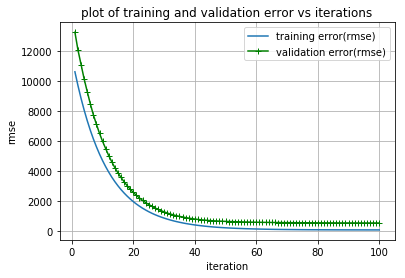

In [40]:
plt.plot(range(1, iteration+1) , result['validation_0']['rmse'], label= 'training error(rmse)')
plt.plot(range(1, iteration +1) , result['validation_1']['rmse'],c= 'green',marker='+',label= 'validation error(rmse)')
plt.grid(True)
plt.xlabel('iteration')
plt.ylabel('rmse')
plt.title('plot of training and validation error vs iterations')
plt.legend()

In [48]:
y_xgb_pred = xgb_reg.predict(X_train)

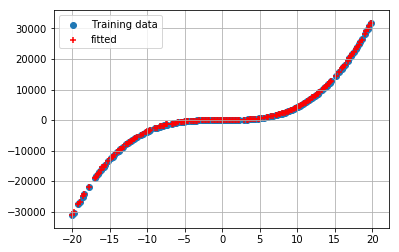

In [49]:
plt.scatter(X_train, y_train, label = 'Training data')
plt.scatter(X_train, y_xgb_pred, c='red', marker='+', label = 'fitted')
plt.grid(True)
plt.legend()

In [50]:
residual = y_xgb_pred - y_train

(array([ 3.,  4.,  8., 15., 93., 18., 12.,  3.,  2.,  2.]),
 array([-259.21131182, -203.55463454, -147.89795726,  -92.24127998,
         -36.58460271,   19.07207457,   74.72875185,  130.38542913,
         186.04210641,  241.69878369,  297.35546097]),
 <a list of 10 Patch objects>)

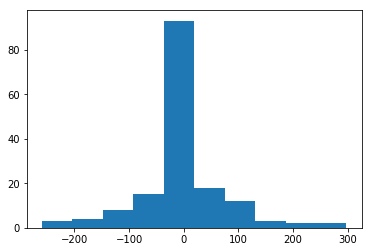

In [51]:
plt.hist(residual)

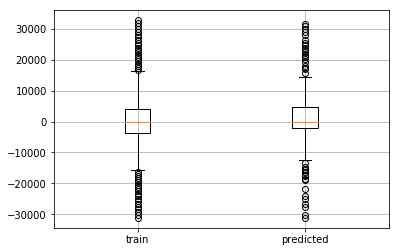

In [53]:
plt.boxplot([y_noisy, y_xgb_pred], labels=['train', 'predicted'])
plt.grid(True)
